# Assignment Sheet 3

Bruce Schultz  
bschultz@uni-bonn.de

Miguel A. Ibarra-Arellano  
ibarrarellano@gmail.com


## Exercise 1

#### Part a

**Pick the "three clusters with equal numbers of points" data set. Set the number of points per class to 10, and number of dimensions to 50. Once run the demo with perplexity=29, and once with perplexity=30. Explain why there is a big difference in the final 2D embedding?**
* As explained in the article, perplexity is essentially a guess as to how many close neighbors each point has. Since there are a total of 30 points, by making the perplexity equal to 30, it causes the algorithm to fail. The perplexity, therefore, should always be set to a value that is less than the number of points. The first setting, with perplexity equal to 29, holds true to this rule and therefore is able to separate the values into distinct clusters

**Try the example "a square grid with equal spacing between points", with 20 points per side. In the resulting plot with perplexity=100, why are distances between points in the middle of the square larger than near the boundary?**
* t-SNE calculates the interaction of all points with every other point which is computationally expensive. One of the approximtions employed by this technique is to to reduce run time is to approximate the effect of clusters distant from the point. Here, distant clusters are calculated as a single value and their avaerage effect is then applied to the distant point. In this example, the densely packed corners of the shape are all pulling on the center points, so the center is being streched in several directions. The boundaries however have fewer directions in which they are interacting which is part of the reason they are able to become more packed. Ultimately it is the cumalative interaction of the distant points/clusters from all directions that make it so the points in the middle have greater distances between their neighbors compared to the points along the boundaries.

**Pick "a square grid with equal spacing between points" data set, with 20 points per side, and perplexity=2. Run the t-SNE multiple times. You will observe that the square grid sometimes breaks down into separate smaller clusters. Why?**
* As stated before, perplexity loosely defines the number of effective neighbors each dot should have. Additionally, it is known that if the perplexity is set too low for a large dataset, clusters may form when there should not be any due to small-scale variations that occur during the early iterations of calculations. This is also why when we run this simulation several times, it turns out different each time. Perplexity is also linked to the KL divergence that is calculated in that as perplexity increases, you will also get smalled KL-divergence values. With perplexity being so low in this simulation, KL-divergence values are high and false positive clusters form and separate. This shows why it is important to play with this parameter.

**Use different perplexities for "points randomly distributed in a circle" with 100 points. Around what perplexity value does the resulting visualization start to resemble the input data set? Explain why the perplexity has to be large enough for the result to look like the input.**
* When perplexity is set to a value of 10, the simulation begins to consistently generate a visualization that resembles the input data. As mentioned above, small perplexity values allow for meaningless clustering to occur so the points would take odd shapes or even form separate clusters. PErplexity is a parameter that is used to balance global (how points affect each other at a distance) and local (points' effects on those near them) interactions. So if set too low, the "number of effective neighbors" will be too low and the correct number of points will not cluster together yielding a result different from the desired one.



#### Part b

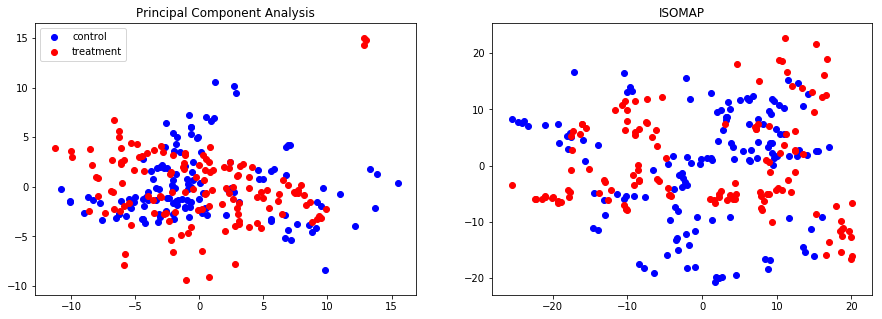

In [26]:
import pandas as pd
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from ourStatistics import interpolate_by_mean as ibm, runPCA

#Read data and interpolate values
cortex_data = pd.read_excel('Data_Cortex_Nuclear.xls').apply(ibm, axis=0)

#Slice data and take only numeric data
cCSs_data = cortex_data[cortex_data['class'] == 'c-SC-s'].select_dtypes(include=[np.number])
tCSs_data = cortex_data[cortex_data['class'] == 't-SC-s'].select_dtypes(include=[np.number])

#Standradize data for PCA
cCSs_data = pd.DataFrame(StandardScaler().fit_transform(cCSs_data))
tCSs_data = pd.DataFrame(StandardScaler().fit_transform(tCSs_data))

#Run PCA
scores_cCSs, loadings_cCSs, summary_cCSs = runPCA(cCSs_data)
scores_tCSs, loadings_tCSs, summary_tCSs = runPCA(tCSs_data)

#Turn data into ISOMAP
def iso(std_data, num_neighbors, num_comp):
    iso = manifold.Isomap(n_neighbors=num_neighbors, n_components=num_comp)
    iso.fit(std_data)
    pre_data = iso.transform(std_data)
    col_list = ["Component {}".format(i) for i in range(1, num_comp+1)]
    return pd.DataFrame(pre_data, columns=col_list)

cCSs_iso = iso(cCSs_data, 10, 2)
tCSs_iso = iso(tCSs_data, 10, 2)

#Plot the 2 side-by-side for comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title("Principal Component Analysis")
ax[0].scatter(scores_cCSs["PC1"], scores_cCSs["PC2"], color='blue', label="control")
ax[0].scatter(scores_tCSs["PC1"], scores_tCSs["PC2"], color='red', label="treatment")

ax[1].set_title("ISOMAP")
ax[1].scatter(cCSs_iso['Component 1'], cCSs_iso['Component 2'], color='blue', label="control")
ax[1].scatter(tCSs_iso['Component 1'], tCSs_iso['Component 2'], color='red', label="treatment")

ax[0].legend(loc="upper left")

#fig.savefig('dimension reduction comparison.png')

Based on these two plots, I would say that ISOMAP would be a better choice since it actually shows distinct clustering. The ISOMAP would thus allow us to better find related genes. 

#### Part c

In [36]:
# Read breast cancer data and interpolate values
bc_data = pd.read_excel('breast-cancer-wisconsin.xlsx').apply(ibm, axis=0)

# Standardize dataset - except class
class_col = bc_data.pop('class')
#bc_data_std = pd.DataFrame(StandardScaler().fit_transform(bc_data)) # Standardize
bc_data_std = pd.DataFrame(MinMaxScaler().fit_transform(bc_data)) # Normalize
bc_data_std['class'] = class_col

# Run t-SNE
def tsne_reduction(pandas_data, n_comps=2, verb=1, perp=30, num_iter=500, initial="random"):
    tsne = TSNE(n_components = n_comps, verbose = verb, perplexity = perp, n_iter=num_iter, init=initial)
    tsne_results = tsne.fit_transform(pandas_data.values)
    col_list = ["Component {}".format(i) for i in range(1, n_comps+1)]
    return pd.DataFrame(tsne_results, columns=col_list)

[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 699 samples in 0.001s...
[t-SNE] Computed neighbors for 699 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 699 / 699
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 215.152283
[t-SNE] Error after 900 iterations: 10.299481
[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 699 samples in 0.001s...
[t-SNE] Computed neighbors for 699 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 699 / 699
[t-SNE] Mean sigma: 1.432152
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.910446
[t-SNE] Error after 4000 iterations: 0.212587
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 699 samples in 0.001s...
[t-SNE] Computed neighbors for 699 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 699 / 699
[t-SNE] Mean sigma: 4.555133
[t-SNE] KL divergence after 250 iterations with early exag

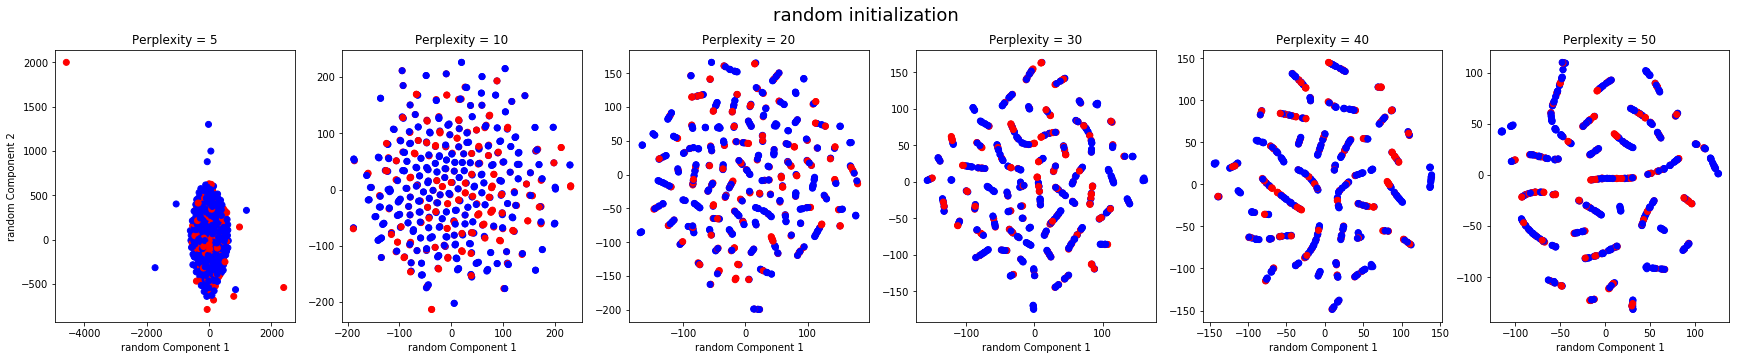

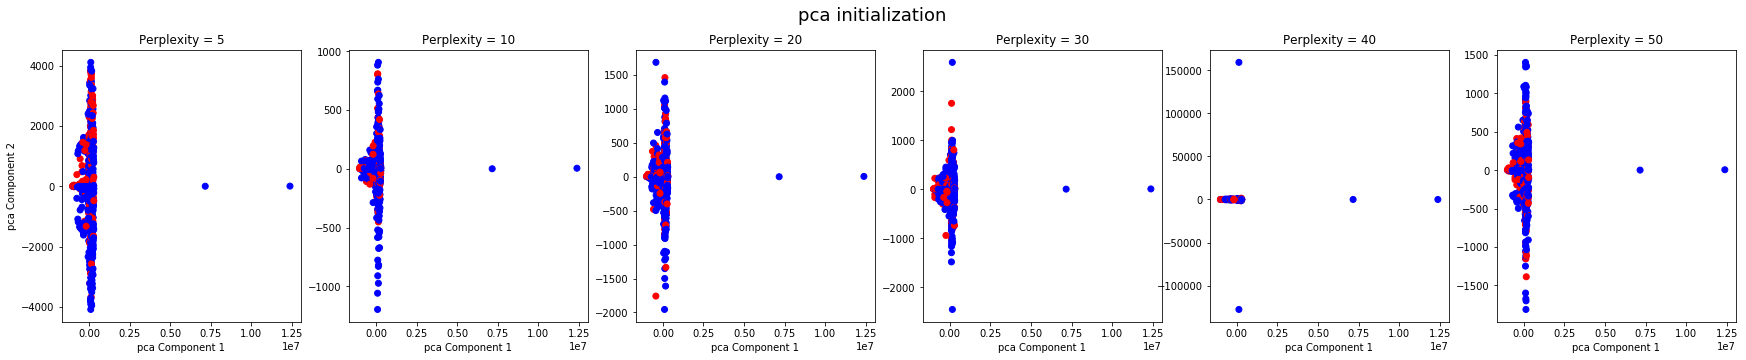

In [37]:
# Create lists of perplexities and initializing schemes to test
perplexities = [5,10,20,30,40,50]
initiate = ['random', 'pca']

# Generate new pandas table for our results and random permutation
bc_data_tsne = bc_data_std.copy()
colors = ["blue" if row is 2 else "red" for row in list(bc_data_tsne['class'])]
labels = ["benign" if row is 2 else "malignant" for row in list(bc_data_tsne['class'])]
bc_data_tsne['colors'] = colors
bc_data_tsne['labels'] = labels

# Iterate over perplexities and generate subplots
for j in range(len(initiate)):
    # Create initial figure
    fig, ax = plt.subplots(1, len(perplexities), figsize=(30, 5))
    for i in range(len(perplexities)):
        tsne_comps = tsne_reduction(bc_data, perp=i, initial=initiate[j], num_iter=300)
        bc_data_tsne['{}_Perp{}_Component 1'.format(initiate[j], perplexities[i])] = tsne_comps['Component 1']
        bc_data_tsne['{}_Perp{}_Component 2'.format(initiate[j], perplexities[i])] = tsne_comps['Component 2']
        ax[i].set_title("Perplexity = {}".format(perplexities[i]))
        ax[i].scatter(bc_data_tsne['{}_Perp{}_Component 1'.format(initiate[j], perplexities[i])], \
                      bc_data_tsne['{}_Perp{}_Component 2'.format(initiate[j], perplexities[i])]\
                      , color=colors, label=labels)
        ax[i].set_xlabel("{} Component 1".format(initiate[j]))
        if i == 0:
            ax[i].set_ylabel("{} Component 2".format(initiate[j]))
    fig.suptitle("{} initialization".format(initiate[j]), x=0.5, y=1.0, fontsize=18)